## Library import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.datasets import load_iris

In [2]:
iris = load_iris(return_X_y=False, as_frame=True)

In [3]:
type(iris.frame)

pandas.core.frame.DataFrame

In [4]:
iris.frame

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0         0  
1         0  
2         0  
3         0  
4         0  
..      ...  
145       2  
146       2  
147       2  
148       2  
149       2  

[150 rows x 5 columns]

In [5]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [6]:
df['target'] = iris.target

In [7]:
type(df)

pandas.core.frame.DataFrame

### DataFrame으로 만드는 방법

- read_
- pd.DataFrame
- pd.DataFrame.from_

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [9]:
df.sample(3)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
80                 5.5               2.4                3.8               1.1   
126                6.2               2.8                4.8               1.8   
148                6.2               3.4                5.4               2.3   

     target  
80        1  
126       2  
148       2

In [10]:
df.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000

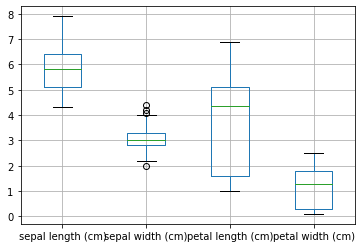

In [12]:
df.iloc[:,:-1].boxplot(figsize=(6,4)) ## 전체적인 통계값을 한눈에 볼 수 있다.

In [50]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [64]:
plt.style.use('ggplot') ## matplotlib에서 style을 지정해줄 수 있다 ==> seaborn에 적용 가능

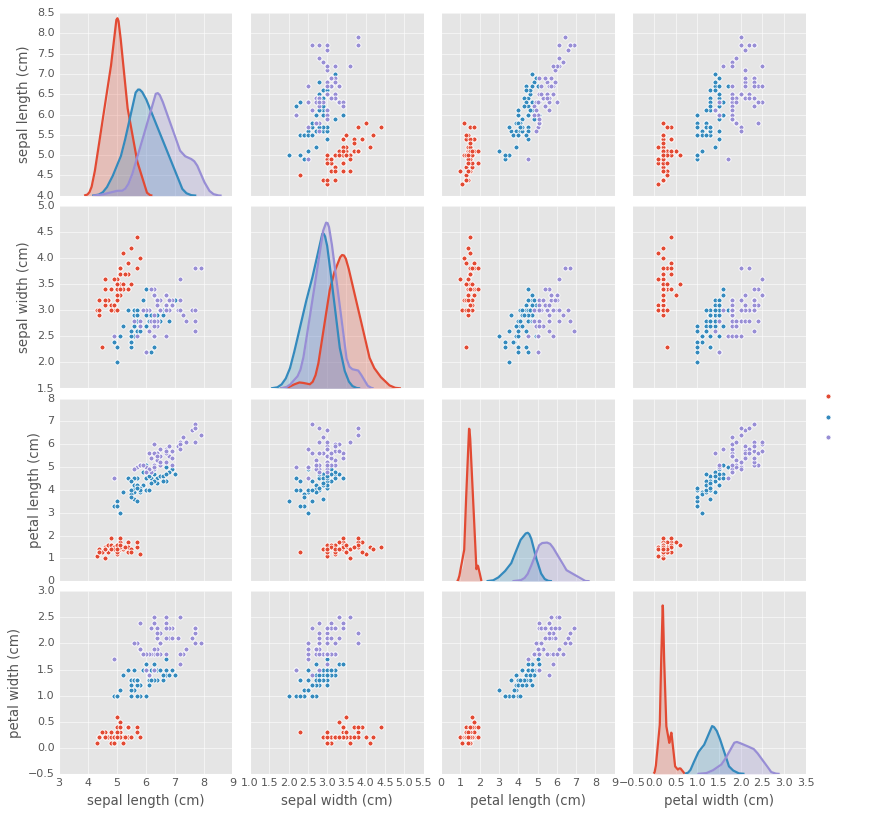

In [65]:
sns.pairplot(df, hue = 'target') ## feature값들의 전체적인 구성 

#### pd.read_ 는 web상의 raw데이터를 이용해서도 가져올 수 있다.

In [13]:
mpg = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/raw/mpg.csv')

In [14]:
mpg = sns.load_dataset('mpg')

In [15]:
mpg.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [16]:
mpg.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [17]:
print(mpg[mpg.horsepower.isna()].index)
mpg[mpg.horsepower.isna()]

Int64Index([32, 126, 330, 336, 354, 374], dtype='int64')


mpg  cylinders  displacement  horsepower  weight  acceleration  \
32   25.0          4          98.0         NaN    2046          19.0   
126  21.0          6         200.0         NaN    2875          17.0   
330  40.9          4          85.0         NaN    1835          17.3   
336  23.6          4         140.0         NaN    2905          14.3   
354  34.5          4         100.0         NaN    2320          15.8   
374  23.0          4         151.0         NaN    3035          20.5   

     model_year  origin                  name  
32           71     usa            ford pinto  
126          74     usa         ford maverick  
330          80  europe  renault lecar deluxe  
336          80     usa    ford mustang cobra  
354          81  europe           renault 18i  
374          82     usa        amc concord dl

### missingno

In [18]:
import missingno as mino ## 결측치 시각화

In [19]:
dir(mino)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_version',
 'bar',
 'dendrogram',
 'heatmap',
 'matrix',
 'missingno',
 'nullity_filter',
 'nullity_sort',
 'utils']

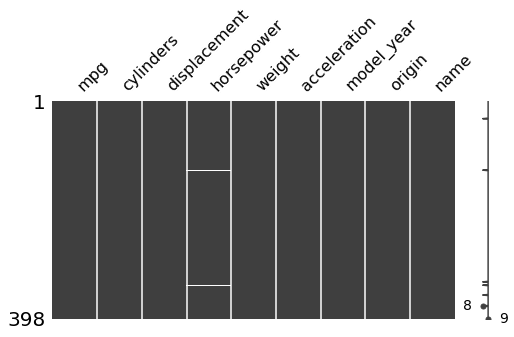

In [21]:
mino.matrix(mpg, figsize=(8,4))

In [23]:
mpg

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year  origin                       name  
0            70     usa  chevrolet chevelle malibu  
1            70     usa          buick skylark 320  
2            70     usa         plymouth satellite  
3            70     usa              amc rebel sst  
4            70     usa                ford torino  
..          ...     ...                        ...  
393          82     usa            ford mustang gl  
394          82  europe                  vw pickup  
395          82     usa              dodge rampage  
396          82     usa                ford ranger  
397          82     usa                 chevy s-10  

[398 rows x 9 columns]

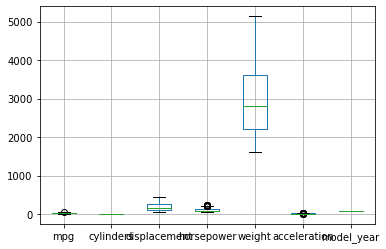

In [24]:
import warnings
warnings.filterwarnings('ignore')
mpg.boxplot() ## 정규화가 필요하다..

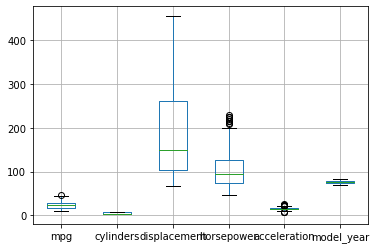

In [25]:
mpg.loc[:, mpg.columns != 'weight'].boxplot()

In [126]:
mpg.describe(include='object')

origin        name
count     398         398
unique      3         305
top       usa  ford pinto
freq      249           6

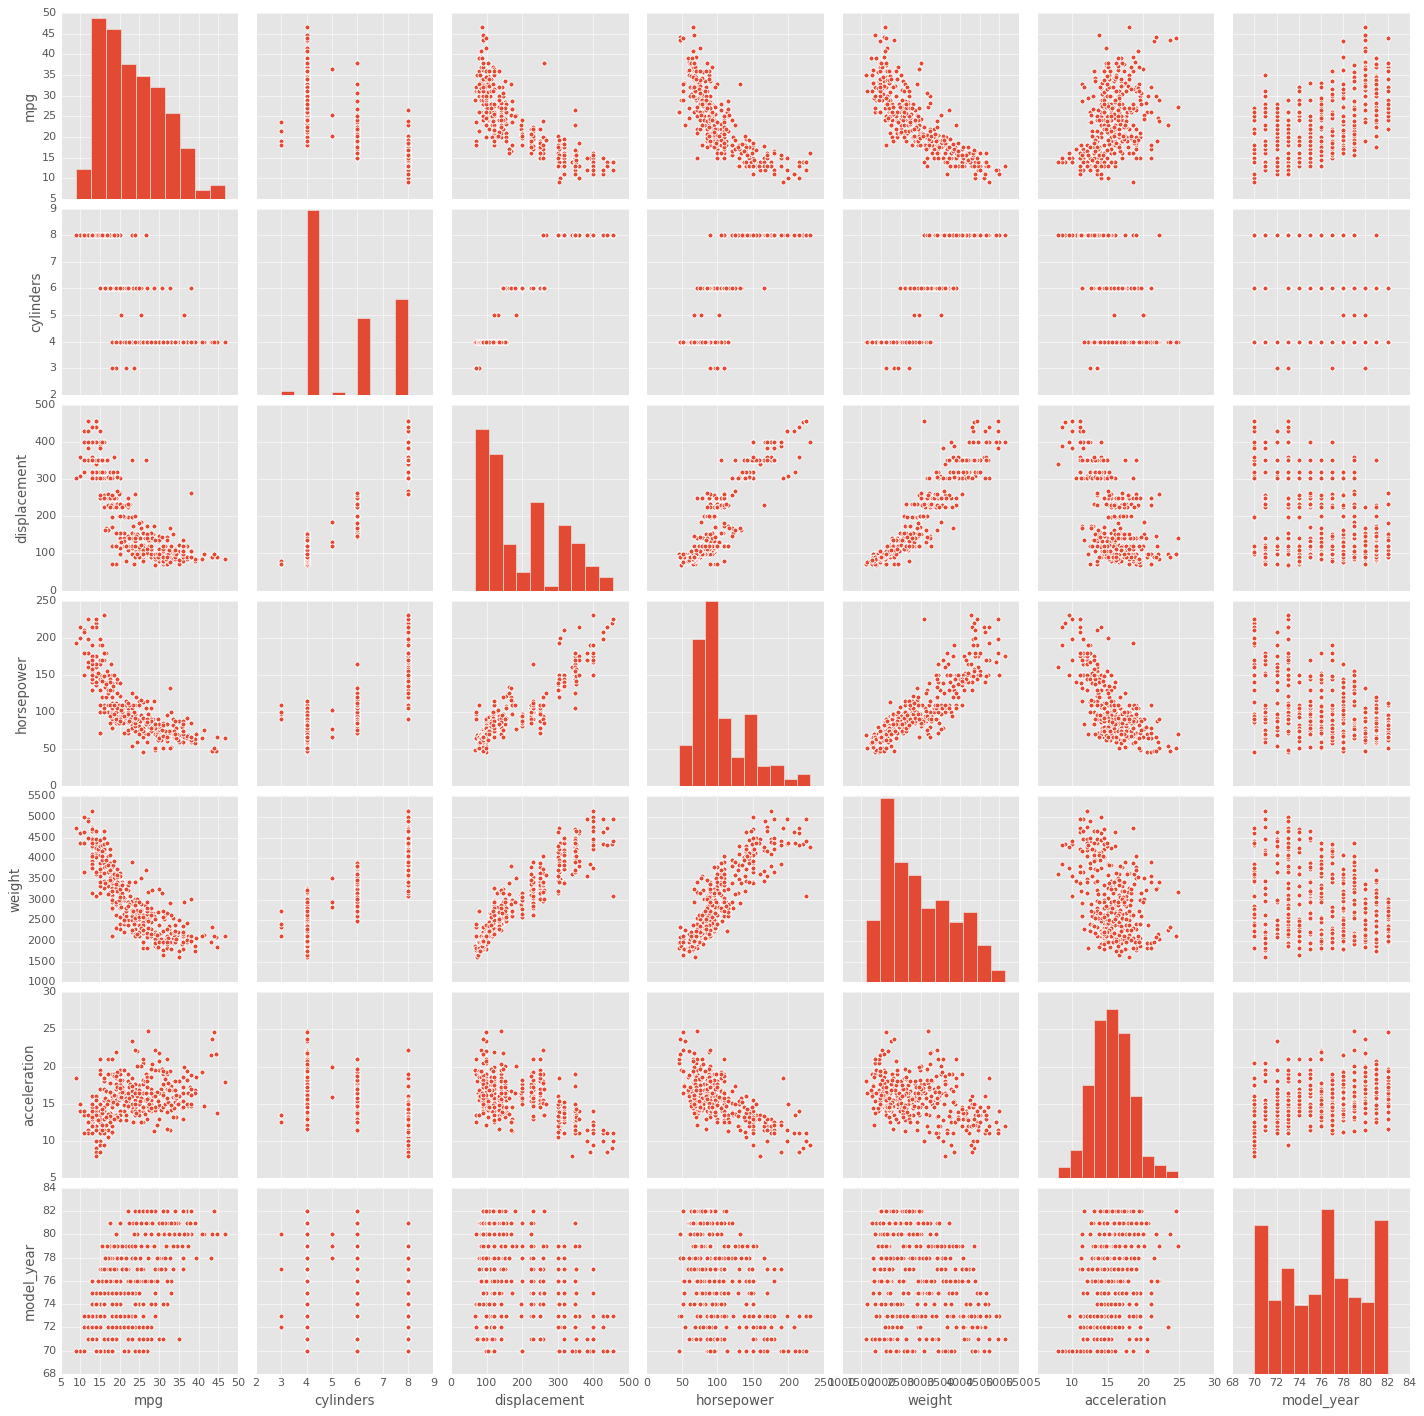

In [412]:
sns.pairplot(mpg.select_dtypes(['int64','float64']))

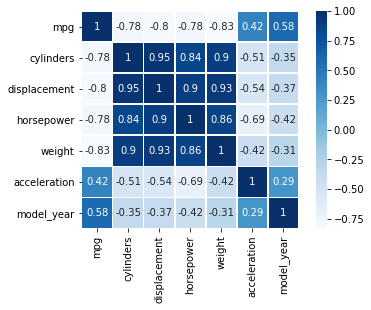

In [28]:
sns.heatmap(mpg.corr(), annot=True, square=True, linewidth=0.5,cmap='Blues')

### pandas-profiling

In [151]:
import pandas_profiling 

In [152]:
report = pandas_profiling.ProfileReport(mpg) 

In [153]:
report

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Version

In [159]:
%load_ext version_information

In [166]:
%load_ext watermark

In [172]:
%watermark -park1 -d -n -v -p numpy,pandas,matplotlib,seaborn,torch

Python implementation: CPython
Python version       : 3.8.3
IPython version      : 7.16.1

numpy     : 1.19.3
pandas    : 1.0.5
matplotlib: 3.2.2
seaborn   : 0.11.1
torch     : 1.8.0



In [170]:
%watermark --iversions

matplotlib      : 3.2.2
seaborn         : 0.11.1
missingno       : 0.5.0
pandas_profiling: 3.0.0
numpy           : 1.19.3
pandas          : 1.0.5
pandocfilters   : 1.4.2



In [171]:
%watermark

Last updated: 2021-07-19T11:56:40.290649+09:00

Python implementation: CPython
Python version       : 3.8.3
IPython version      : 7.16.1

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 142 Stepping 12, GenuineIntel
CPU cores   : 8
Architecture: 64bit



## Pipeline
- statsmodels
- Fbprophet
- Scikit-Learn
- Tensorflow
- pytorch

### Machine Learning
- Data로 부터 Specific한 문제해결을 위한 최적의 모델을 만드는 것

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,:4], df.target, test_size=0.2, random_state=42, shuffle=True, stratify = df.target  )

## Cross validation

In [33]:
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

### Cross_validate

In [36]:
a = cross_validate(RandomForestClassifier(), df.iloc[:,:4], df.iloc[:,-1], cv=5, n_jobs=-1,verbose=False, return_train_score=True)
b = cross_validate(SVC(), df.iloc[:,:4], df.iloc[:,-1], cv=5, n_jobs=-1,verbose=False, return_train_score=True)
c = cross_validate(DecisionTreeClassifier(), df.iloc[:,:4], df.iloc[:,-1], cv=5, n_jobs=-1,verbose=False, return_train_score=True)

In [37]:
a ## dict 형태로 이루어져 있다.

{'fit_time': array([0.1580286 , 0.13999486, 0.25419998, 0.27628803, 0.28058815]),
 'score_time': array([0.0090034 , 0.00900435, 0.01199961, 0.00900197, 0.01073408]),
 'test_score': array([0.96666667, 0.96666667, 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([1., 1., 1., 1., 1.])}

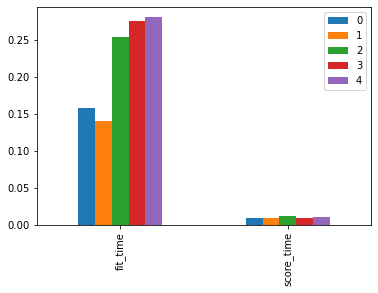

In [38]:
pd.DataFrame.from_dict(a).T.iloc[:2,:].plot.bar()

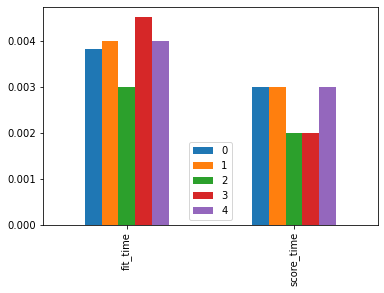

In [39]:
pd.DataFrame.from_dict(b).T.iloc[:2,:].plot.bar()

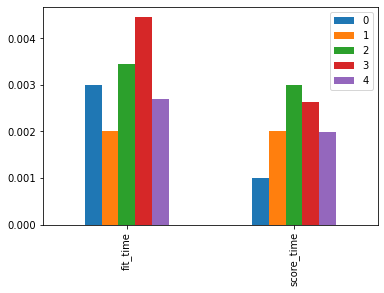

In [40]:
pd.DataFrame.from_dict(c).T.iloc[:2,:].plot.bar()

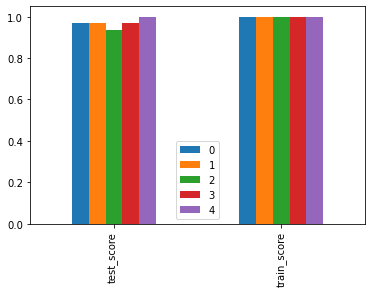

In [41]:
pd.DataFrame.from_dict(a).T.iloc[2:,:].plot.bar()

### Cross_val_score

In [42]:
RF = cross_val_score(RandomForestClassifier(), df.iloc[:,:4], df.iloc[:,-1], cv=5, n_jobs=-1,verbose=False) ##n_jobs = -1 은 cpu코어를 모두다 사용하겠다.
svc = cross_val_score(SVC(), df.iloc[:,:4], df.iloc[:,-1], cv=5, n_jobs=-1,verbose=False)
dt = cross_val_score(DecisionTreeClassifier(), df.iloc[:,:4], df.iloc[:,-1], cv=5, n_jobs=-1,verbose=False) 

In [43]:
RF.mean(), svc.mean(), dt.mean()

(0.9666666666666668, 0.9666666666666666, 0.9666666666666668)

### Cross_val_predict

In [263]:
pred = cross_val_predict(rf, df.iloc[:,:4], df.iloc[:,-1], cv=5, n_jobs=-1,verbose=False) ## Cross validation한 각각의 cv에대해서 voting하여 우수한 결과를 출력

In [264]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [265]:
df[pred != df.target] ## 틀린 결과

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
70                 5.9               3.2                4.8               1.8   
77                 6.7               3.0                5.0               1.7   
83                 6.0               2.7                5.1               1.6   
106                4.9               2.5                4.5               1.7   
119                6.0               2.2                5.0               1.5   
133                6.3               2.8                5.1               1.5   

     target  
70        1  
77        1  
83        1  
106       2  
119       2  
133       2

### Learning_curve(학습을 위한 data- size 가 적절한지 알아보는 법)

In [44]:
import sklearn_evaluation ## learning curve를 visualization 하기위한 library

In [45]:
from sklearn.model_selection import learning_curve

In [47]:
train_size, train_score, test_score = learning_curve(RandomForestClassifier(), df.iloc[:,:4], df.iloc[:,-1], cv=5, n_jobs=-1,verbose=False )

In [48]:
dir(sklearn_evaluation) ## 핵심은 plot

['ClassifierEvaluator',
 'NotebookCollection',
 'NotebookIntrospector',
 'SQLiteTracker',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'compute',
 'evaluator',
 'metrics',
 'nb',
 'plot',
 'preprocessing',
 'report',
 'table',
 'util',
 'validate']

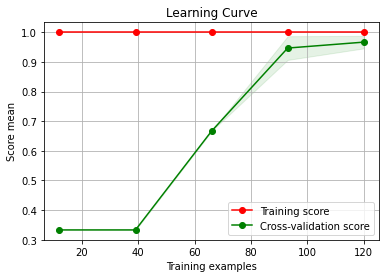

In [49]:
sklearn_evaluation.plot.learning_curve(train_score, test_score, train_size)

In [51]:
train_size, train_score, test_score = learning_curve(RandomForestClassifier(), df.iloc[:,:4], df.iloc[:,-1], train_sizes = np.array([.1,.2,.3,.4,.5,.6,.7,.8,.9,1.0]),cv=10, n_jobs=-1,verbose=False )

## train_size를 조정할 수 있다.

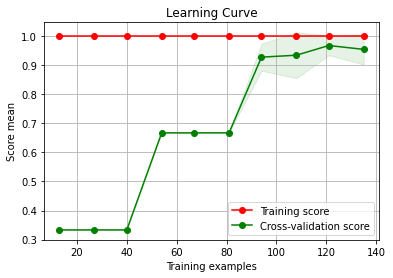

In [52]:
sklearn_evaluation.plot.learning_curve(train_score, test_score, train_size)

- 딥러닝도 sklearn연동해서 learning curve 그릴 수 있다.

#### 이런식으로도 train_test_split이 가능하다(sample을 사용하여)

In [53]:
train = df.sample(frac=0.7)
test = df.drop(index = train.index)

In [54]:
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

In [55]:
iris = sns.load_dataset('iris')

In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
knn = KNeighborsClassifier()  

In [58]:
knn.get_params() ## hyperparameter보는법

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [59]:
x_train,x_test, y_train, y_test = train_test_split(iris.iloc[:,:-1], iris.species, random_state=42, shuffle=True, stratify=iris.species)

In [60]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [61]:
knn.predict(x_test) ### 이렇게 target을 인코딩하지 않아도 학습 가능하다.(feature는 안되지만 target값이 문자일때만 가능)

array(['setosa', 'versicolor', 'versicolor', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'virginica', 'virginica', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'setosa', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'setosa', 'virginica', 'setosa', 'versicolor',
       'virginica', 'virginica', 'setosa', 'setosa', 'setosa', 'setosa',
       'virginica', 'versicolor'], dtype=object)

In [62]:
knn.score(x_test,y_test)

0.9736842105263158

In [65]:
mpg.drop(['origin','name'], axis=1, inplace=True)

In [66]:
mpg.dropna(axis=0, inplace=True)

In [67]:
mpg.shape

(392, 7)

In [68]:
mpg.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
dtype: int64

In [69]:
x = mpg.iloc[:,1:]
y = mpg.mpg

In [70]:
x_train,x_test, y_train, y_test = train_test_split(x,y, random_state=42, shuffle=True)

In [71]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [72]:
rf = RandomForestRegressor()
knn = KNeighborsRegressor()

In [73]:
rf.fit(x_train, y_train)

RandomForestRegressor()

In [74]:
pred = rf.predict(x_test)

In [75]:
pred

array([26.475, 22.784, 35.688, 30.613, 27.426, 27.53 , 12.71 , 27.936,
       19.564, 32.452, 13.98 , 20.419, 15.97 , 27.17 , 18.827, 29.769,
       20.13 , 32.799, 29.814, 31.684, 20.819, 36.559, 32.938, 16.236,
       31.191, 25.207, 20.613, 18.482, 29.181, 23.745, 15.055, 19.851,
       19.967, 30.735, 13.425, 33.593, 13.98 , 27.7  , 14.51 , 11.67 ,
       14.895, 28.714, 33.875, 26.305, 14.65 , 11.81 , 17.901, 36.096,
       23.399, 31.463, 13.925, 24.76 , 23.687, 34.831, 29.002, 15.72 ,
       18.415, 19.133, 23.985, 24.497, 11.89 , 19.772, 26.326, 21.964,
       26.137, 26.375, 25.066, 31.164, 19.5  , 13.75 , 23.642, 13.155,
       22.137, 27.489, 22.261, 27.275, 13.76 , 16.515, 27.165, 19.368,
       25.043, 21.485, 14.105, 37.286, 15.81 , 37.549, 26.68 , 20.763,
       17.304, 16.122, 26.373, 27.439, 31.311, 29.766, 19.515, 18.806,
       20.871, 12.485])

In [76]:
y_test

79     26.0
276    21.6
248    36.1
56     26.0
393    27.0
       ... 
370    31.0
252    19.2
211    16.5
76     18.0
105    13.0
Name: mpg, Length: 98, dtype: float64

In [77]:
from sklearn.metrics import mean_squared_error

In [78]:
mean_squared_error(pred, y_test)

6.32989346938775

In [79]:
temp = []
for idx, i in enumerate(range(100,501,100)):
    knn = RandomForestRegressor(n_estimators= i)
    knn.fit(x_train,y_train)
    pred = knn.predict(x_test)
    mse = mean_squared_error(pred, y_test)
    temp.append((i, mse))

In [364]:
temp

[(100, 6.837393959183673),
 (200, 6.198959579081644),
 (300, 5.881513119047632),
 (400, 6.087881531250021),
 (500, 6.2467782057142855)]

- 알고리즘에 따라서 전처리 다르게

## feature_selection(over fitting 방지)

- filter method 
: Filtering은 사전적 의미 처럼 도움이 되지 않는 피처들을 걸러내는 작업을 말합니다.  통계적인 측정 방법을 이용하여 피처들의 상관관계를 알아내고 적합한 피처들만 선택하여 알고리즘에 적용하는 방식입니다.<br>
- wrapper method
- embeded method
- Feature Selection은 ML에 있어서 매우 중요한 테크닉이자 기술입니다. 어떻게 보면 여러분의 모델의 성능을 높이기 위해서, 컴페티션에서 좋은 성적을 얻기 위해서는 반드시 필요한 기술 중 하나입니다. 피처를 선택해야하는 것은 어떻게 보면 매우 직관적인 아이디어입니다. raw data에서의 피처를 모두 사용하기에는 computing power과 memory 측면에서 매우 비효율적이기에 일부 필요한 피처만 선택을 한다는 아이디어입니다.

### filter method

In [86]:
from sklearn.feature_selection import chi2, SelectKBest ## target값과의 통계값을 통해서 알아낸다

In [87]:
skb = SelectKBest(chi2, k = 3) 

In [88]:
skb.fit(df.iloc[:,:-1], df.target)

SelectKBest(k=3, score_func=<function chi2 at 0x0000026EC54FDEE0>)

In [89]:
vars(skb)

{'score_func': <function sklearn.feature_selection._univariate_selection.chi2(X, y)>,
 'k': 3,
 'n_features_in_': 4,
 'scores_': array([ 10.81782088,   3.7107283 , 116.31261309,  67.0483602 ]),
 'pvalues_': array([4.47651499e-03, 1.56395980e-01, 5.53397228e-26, 2.75824965e-15])}

In [90]:
skb.scores_ ## target값과 feature값과의 상관관계를 나타내준다. 2번 featrue가 제일 연관이 낮다

array([ 10.81782088,   3.7107283 , 116.31261309,  67.0483602 ])

In [91]:
new_feature = skb.transform(df.iloc[:,:-1])

In [92]:
pd.DataFrame(new_feature) ## target과 제일 연관성이 낮은 2번째 feature가 사라졌다.

0    1    2
0    5.1  1.4  0.2
1    4.9  1.4  0.2
2    4.7  1.3  0.2
3    4.6  1.5  0.2
4    5.0  1.4  0.2
..   ...  ...  ...
145  6.7  5.2  2.3
146  6.3  5.0  1.9
147  6.5  5.2  2.0
148  6.2  5.4  2.3
149  5.9  5.1  1.8

[150 rows x 3 columns]

In [93]:
from sklearn.feature_selection import RFE ## estimator까지 고려하여 feature selection
from sklearn.linear_model import LogisticRegression

In [94]:
rfe = RFE(LogisticRegression(), n_features_to_select = 3) ## 알고리즘까지 고려해서 feature selection 진행하였다.

### Wrapper method

In [397]:
dt = DecisionTreeClassifier()

In [399]:
dt.fit(df.iloc[:,:-1], df.target)

DecisionTreeClassifier()

In [405]:
dt.feature_importances_ 

array([0.01333333, 0.01333333, 0.05072262, 0.92261071])

### PCA(feature selection과는 다른의미)
- 새로운 feature를 생성

In [406]:
from sklearn.decomposition import PCA

In [407]:
pca = PCA(3)

In [409]:
pd.DataFrame(pca.fit_transform(df.iloc[:,:-1], df.target))

0         1         2
0   -2.684126  0.319397 -0.027915
1   -2.714142 -0.177001 -0.210464
2   -2.888991 -0.144949  0.017900
3   -2.745343 -0.318299  0.031559
4   -2.728717  0.326755  0.090079
..        ...       ...       ...
145  1.944110  0.187532  0.177825
146  1.527167 -0.375317 -0.121898
147  1.764346  0.078859  0.130482
148  1.900942  0.116628  0.723252
149  1.390189 -0.282661  0.362910

[150 rows x 3 columns]